# Exploratory Data Analysis and Data Cleaning <a name="Top"></a>

# TABLE OF CONTENT

[ABOUT THIS DATASET](#About)  
1. [IMPORT LIBRARIES](#ImportLibraries)  
2. [DATA EXPLORATION AND DATA CLEANING](#DataExplDataClean)  
    2.1 [Data types](#DataTypes_df1)      
    2.2 [Missing values](#Missing_df1)       
    2.3 [Uniform Values](#UniformValues_df1)     
    2.4 [Remove Duplicates](#RemDupl_df1)    
    2.5 [Numeric data](#NumData_df1)    
    2.6 [Categorical data](#CatData_df1)    
3. [DATA ANALYSIS](#DataAnalysis) 
4. [FINAL CONCLUSIONS](#Conclusions) <a name="Conclusions"></a>

# ABOUT THIS DATASET <a name="About"></a>

This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category and Size, to help optimize product profitability. It covers a 90 days time frame, from 31 March 2022 to 29 June 2022.

**Attributes:**
* **Order ID**: Order Identification Number. (String)
* **Date**: Date of the sale. (Date)
* **Status**: Status of the sale. (String)
* **Fulfilment**: Method of fulfilment. (String)
* **Sales Channel**: Method of selling. (String)
* **Ship Service Level**:  Method of Shipping Service. (String)  
* **Style**: Style of the product. (String)
* **SKU**: Stock Keeping Unit. (String)
* **Category**: Type of product. (String)
* **Size**: Size of the product. (String)
* **ASIN**: Amazon Standard Identification Number. (String)
* **Courier Status**: Status of the courier. (String)
* **Qty**: Quantity of the product. (Integer)
* **Currency**: The currency used for the sale (INR). (String)
* **Amount**: Amount of the sale. (Float)
* **Ship City**: Destination City of the shipment. (String)
* **Ship State**: Destination State of the shipment. (String)
* **Ship Postal Code**: Destination Postal Code of the shipment. (String)
* **Ship Country**: Destination Country of the shipment. (String)
* **Promotion IDS**: Promotion code of the sale. (String)
* **B2B**: Business to business sale. (Boolean)

 
**Questions to be answered:**

1. Which categories have sold most?  [[&#8599;]](#AQ1)    
2. Which are the 20 Best-Selling Products?   [[&#8599;]](#AQ2)    
3. Which are the 20 Best-Selling Products by Revenue?   [[&#8599;]](#AQ3)    
4. Which are the 20 cities that made the most orders?   [[&#8599;]](#AQ4)    
5. Which are the 20 cities that more income generate?    [[&#8599;]](#AQ5)    
6. How many orders are fulfilled by Amazon and how many by the Merchant?    [[&#8599;]](#AQ6)    

# 1. IMPORT LIBRARIES [&#129081;](#Top)<a name="ImportLibraries"></a>

**LIBRARIES:**

* Library **pandas**: to handle data in tabular representation.
* Library **numpy**: for linear algebra routines.
* Library **missingno**: to graphically display missing values in the data.
* Library **re**: to work with regular expressions.
* Library **matplotlib, seaborn**: to visualize data in in plots, graphs and charts.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# 2 DATA DESCRIPTION AND DATA CLEANING [&#129081;](#Top)<a name="DataExplDataClean"></a>
In this phase, will be performed the exploratory data analysis: data types, missing values, string standardisation, duplicates, measures of the central trend, and relationship detection between fields.

## 2.1 Data types [&#129081;](#Top)<a name="DataTypes_df1"></a>

In [3]:
# Load data
df = pd.read_csv("Data in\\Amazon Sale Report.csv", low_memory=False) 

In [4]:
df.head() # Display the first 5 lines of the dataset

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI   TAMIL NADU   

  ship-postal-code  ship-country  \
0         400081.0            IN   
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   

                                       promotion-ids    B2B  fulfilled-by  \
0                                                NaN  False     Easy Ship   
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

* Check the dimension of the data

In [5]:
df_sizes = {'start': df.shape}

In [6]:
print(f"Raw data contains {df_sizes['start'][0]} records and {df_sizes['start'][1]} columns.")

Raw data contains 128975 records and 24 columns.


* Standardize the column names

In [7]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [8]:
df = df.rename(columns={'Order ID': 'Order_ID', 'Sales Channel ': 'Sales_channel',
        'ship-service-level': 'ship_service_level', 'ship-city': 'ship_city', 
        'ship-state': 'ship_state', 'ship-postal-code': 'ship_postal_code', 'ship-country': 'ship_country', 
        'promotion-ids': 'promotion_ids','Courier Status': 'Courier_Status', 'currency': 'Currency', 
        'fulfilled-by':'fulfilled_by'})

* Check columns data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order_ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales_channel       128975 non-null  object 
 6   ship_service_level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier_Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  Currency            121180 non-null  object 
 15  Amount              121180 non-nul

The dataset contains 24 columns, of which 4 containig numeric values:
* index  (int)
* Qty (int)
* Amount (float)
* ship-postal-code (float), later it will be converted to integer

* Set the column 'index' as the index of the dataframe. With this operation the number of columns becomes 22.

In [10]:
df.set_index('index', inplace = True)

## 2.2 Missing values [&#129081;](#Top)<a name="Missing_df1"></a>
### Evaluate how many values are missing for each attribute and how they are distributed.

* Create a separate dataframe containing the informations about missing and unique values for each column, to better see the correlations.

In [11]:
def missing_evaluation(dataframe):
    '''
    missing_evaluation(dataframe)
    
    Returns a dataframe containing the informations about missing and unique values 
    for each column on a dataframe passed as a parameter

    Parameters: 
    dataframe: dataframe to analyze
    '''
    
    # Column 'qt_missing': Number of NaN values
    df_missing_stats = pd.DataFrame(data=dataframe.isna().sum(), index=dataframe.columns, columns=['qt_missing'])
    # Column 'nr_unique_values': Number of unique values
    df_missing_stats['qt_unique_values'] = pd.DataFrame(data=dataframe.nunique(), index=dataframe.columns)
    # Column 'unique_values': unique values of the attributes
    df_missing_stats['unique_values'] = pd.DataFrame(data=dataframe.apply(pd.unique), index=dataframe.columns)
    # Column 'perc_missing': percentage of missing values
    df_missing_stats['perc_missing'] = pd.DataFrame(data=dataframe.isnull().mean())
    return df_missing_stats

In [12]:
df_missing_stats = missing_evaluation(df)
df_missing_stats

qt_missing  qt_unique_values  \
Order_ID                     0            120378   
Date                         0                91   
Status                       0                13   
Fulfilment                   0                 2   
Sales_channel                0                 2   
ship_service_level           0                 2   
Style                        0              1377   
SKU                          0              7195   
Category                     0                 9   
Size                         0                11   
ASIN                         0              7190   
Courier_Status            6872                 3   
Qty                          0                10   
Currency                  7795                 1   
Amount                    7795              1410   
ship_city                   33              8955   
ship_state                  33                69   
ship_postal_code            33              9459   
ship_country                33                 1   
promotion_ids            49153              5787   
B2B                          0                 2   
fulfilled_by             89698                 1   
Unnamed: 22              49050                 1   

                                                        unique_values  \
Order_ID            [405-8078784-5731545, 171-9198151-1101146, 404...   
Date                [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...   
Status              [Cancelled, Shipped - Delivered to Buyer, Ship...   
Fulfilment                                         [Merchant, Amazon]   
Sales_channel                                 [Amazon.in, Non-Amazon]   
ship_service_level                              [Standard, Expedited]   
Style               [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...   
SKU                 [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...   
Category            [Set, kurta, Western Dress, Top, Ethnic Dress,...   
Size                 [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]   
ASIN                [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...   
Courier_Status                   [nan, Shipped, Cancelled, Unshipped]   
Qty                                  [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]   
Currency                                                   [INR, nan]   
Amount              [647.62, 406.0, 329.0, 753.33, 574.0, 824.0, 6...   
ship_city           [MUMBAI, BENGALURU, NAVI MUMBAI, PUDUCHERRY, C...   
ship_state          [MAHARASHTRA, KARNATAKA, PUDUCHERRY, TAMIL NAD...   
ship_postal_code    [400081.0, 560085.0, 410210.0, 605008.0, 60007...   
ship_country                                                [IN, nan]   
promotion_ids       [nan, Amazon PLCC Free-Financing Universal Mer...   
B2B                                                     [False, True]   
fulfilled_by                                         [Easy Ship, nan]   
Unnamed: 22                                              [nan, False]   

                    perc_missing  
Order_ID                0.000000  
Date                    0.000000  
Status                  0.000000  
Fulfilment              0.000000  
Sales_channel           0.000000  
ship_service_level      0.000000  
Style                   0.000000  
SKU                     0.000000  
Category                0.000000  
Size                    0.000000  
ASIN                    0.000000  
Courier_Status          0.053282  
Qty                     0.000000  
Currency                0.060438  
Amount                  0.060438  
ship_city               0.000256  
ship_state              0.000256  
ship_postal_code        0.000256  
ship_country            0.000256  
promotion_ids           0.381105  
B2B                     0.000000  
fulfilled_by            0.695468  
Unnamed: 22             0.380306

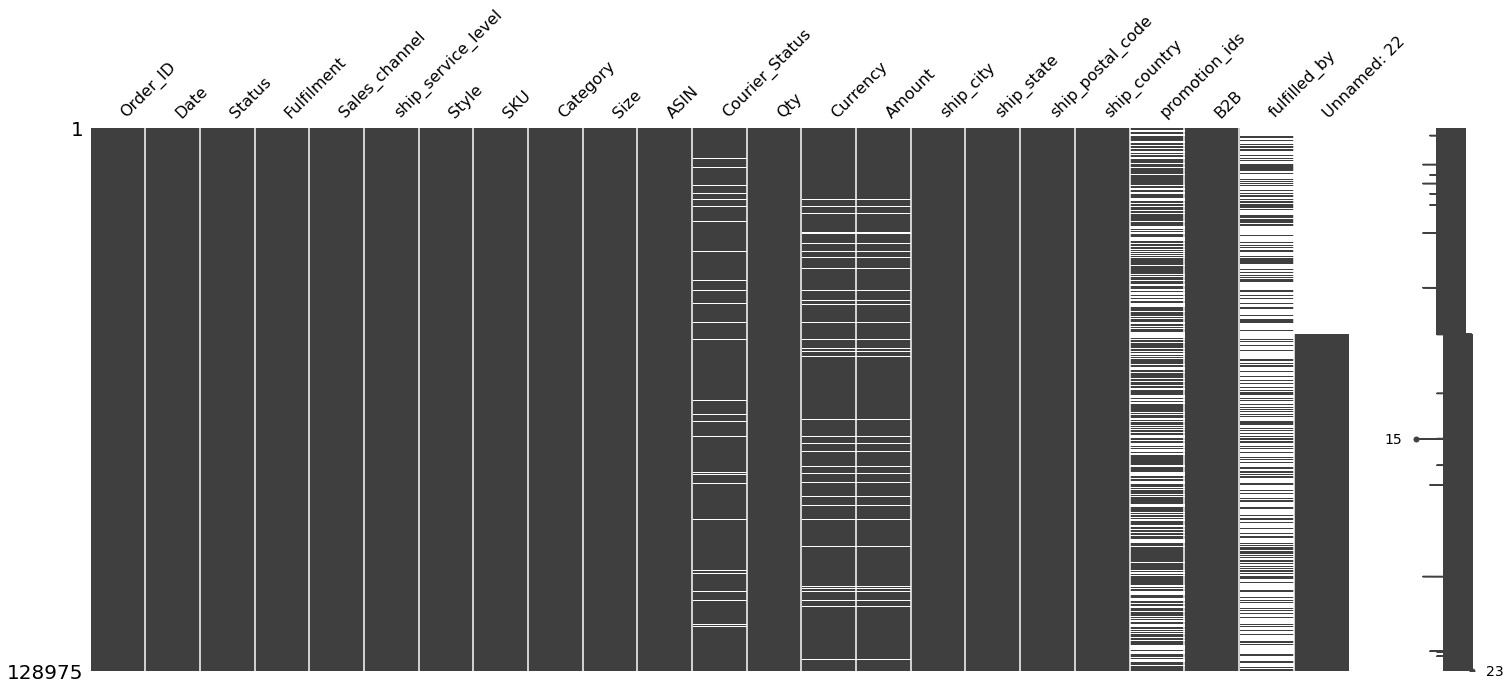

In [13]:
# Visualize the distribution of missing values with missingno matrix
msno.matrix(df);

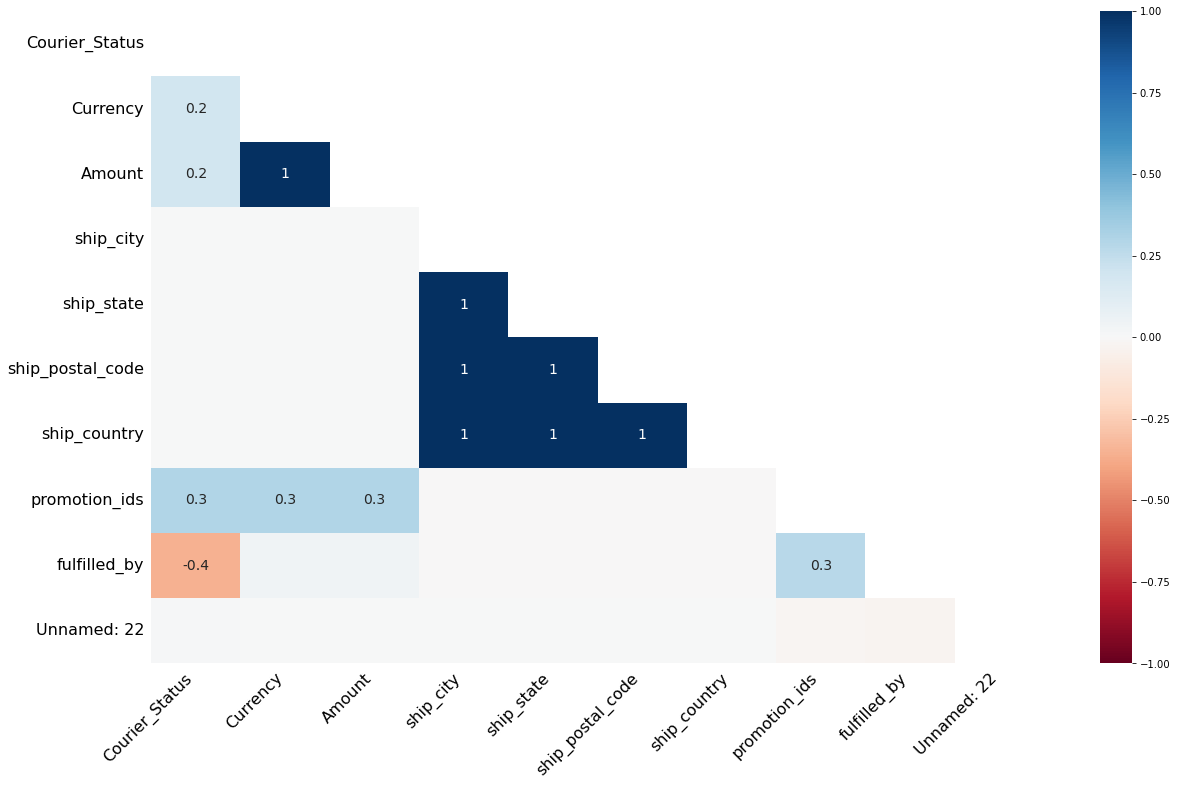

In [14]:
# Use the heatmap to identify correlations of the nullity between each of the different columns.
msno.heatmap(df);

Worth noting that:
* When one of the columns **'Amount'** and **'Currency'** is null, the other is also null (7795 raws with null values).
* When one of columns **'ship_city', 'ship_state', 'ship_postal_code', 'ship_country'** has a null value, the others are also null (33 raws with null values).

### Fill in (or eliminate) the missing values with a case-by-case assessment.
After the exploration of the missing values, it's possible to proceed fill (or clean) each column, performing an individual assessment.

* **Courier_Status**: missing values filled with 'Unknown'

In [15]:
# Replace NaN values in column 'Courier_Status' with the value 'Unknown'
df['Courier_Status'].fillna('Unknown', inplace = True)

* Check nullity correlation on **Amount** and **Currency** columns
* Fill missing values in **Amount** with zero
* Fill missing values in **Currency** with 'INR'

In [16]:
set_idx_amount_null = set(df[df['Amount'].isnull()].index)

In [17]:
set2_idx_currency_null = set(df[df['Currency'].isnull()].index)

In [18]:
print(f"Question: Columns 'Amount' and 'Currency' have 1 to 1 nullity correlation?\nAnswer: {set_idx_amount_null == set2_idx_currency_null}") 

Question: Columns 'Amount' and 'Currency' have 1 to 1 nullity correlation?
Answer: True


In [19]:
df['Amount'].fillna(0, inplace = True)

In [20]:
df['Currency'].fillna('INR', inplace = True)

* **promotion_ids**: missing values filled with 'No Promo'

In [21]:
# Replace NaN values in column 'promotion_ids' with the value 'Unknown'
df['promotion_ids'].fillna('No Promo', inplace = True)

* **ship_city** and **ship_state**: missing values filled with 'Unknown'
* **ship_postal_code**: missing values filled with zero
* **ship_country**: missing values filled with 'Unknown'

In [22]:
df['ship_city'].fillna('Unknown', inplace = True)
df['ship_state'].fillna('Unknown', inplace = True)
df['ship_postal_code'].fillna(0, inplace = True)
df['ship_country'].fillna('Unknown', inplace = True)

* **fulfilled_by**: missing values filled with 'FBA' (Fulfilled by Amazon).

In [23]:
df['fulfilled_by'].fillna('FBA', inplace = True)

* **Unnamed: 22** will be deleted because it isn't relevant

In [24]:
df.drop(columns = ['Unnamed: 22'], inplace = True)

### Check that none of the missing values are left

In [25]:
df.isna().sum().sum()

0

In [26]:
df_missing_stats = missing_evaluation(df)
df_missing_stats

qt_missing  qt_unique_values  \
Order_ID                     0            120378   
Date                         0                91   
Status                       0                13   
Fulfilment                   0                 2   
Sales_channel                0                 2   
ship_service_level           0                 2   
Style                        0              1377   
SKU                          0              7195   
Category                     0                 9   
Size                         0                11   
ASIN                         0              7190   
Courier_Status               0                 4   
Qty                          0                10   
Currency                     0                 1   
Amount                       0              1410   
ship_city                    0              8956   
ship_state                   0                70   
ship_postal_code             0              9460   
ship_country                 0                 2   
promotion_ids                0              5788   
B2B                          0                 2   
fulfilled_by                 0                 2   

                                                        unique_values  \
Order_ID            [405-8078784-5731545, 171-9198151-1101146, 404...   
Date                [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...   
Status              [Cancelled, Shipped - Delivered to Buyer, Ship...   
Fulfilment                                         [Merchant, Amazon]   
Sales_channel                                 [Amazon.in, Non-Amazon]   
ship_service_level                              [Standard, Expedited]   
Style               [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...   
SKU                 [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...   
Category            [Set, kurta, Western Dress, Top, Ethnic Dress,...   
Size                 [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]   
ASIN                [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...   
Courier_Status               [Unknown, Shipped, Cancelled, Unshipped]   
Qty                                  [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]   
Currency                                                        [INR]   
Amount              [647.62, 406.0, 329.0, 753.33, 574.0, 824.0, 6...   
ship_city           [MUMBAI, BENGALURU, NAVI MUMBAI, PUDUCHERRY, C...   
ship_state          [MAHARASHTRA, KARNATAKA, PUDUCHERRY, TAMIL NAD...   
ship_postal_code    [400081.0, 560085.0, 410210.0, 605008.0, 60007...   
ship_country                                            [IN, Unknown]   
promotion_ids       [No Promo, Amazon PLCC Free-Financing Universa...   
B2B                                                     [False, True]   
fulfilled_by                                         [Easy Ship, FBA]   

                    perc_missing  
Order_ID                     0.0  
Date                         0.0  
Status                       0.0  
Fulfilment                   0.0  
Sales_channel                0.0  
ship_service_level           0.0  
Style                        0.0  
SKU                          0.0  
Category                     0.0  
Size                         0.0  
ASIN                         0.0  
Courier_Status               0.0  
Qty                          0.0  
Currency                     0.0  
Amount                       0.0  
ship_city                    0.0  
ship_state                   0.0  
ship_postal_code             0.0  
ship_country                 0.0  
promotion_ids                0.0  
B2B                          0.0  
fulfilled_by                 0.0

## 2.3 Uniform the values in each column [&#129081;](#Top)<a name="UniformValues_df1"></a>
To make values consistent, such as eliminating duplicates and having unique values, it is first of all necessary to standardize the style of the strings.
It's a procedure in which the intervention to apply for each column must be evaluated individually.

* **Order_ID**: it's proper that it's a string, remove extra white spaces from the beginning and end, and set the characters in UPPER case.

In [27]:
df['Order_ID'] = df['Order_ID'].str.strip()

In [28]:
df['Order_ID'] = df['Order_ID'].str.upper()

* **Date**: it's in string format, set it to to dtype datetime. 

In [29]:
# Set column 'Date' to data type datetime
df['Date'] = pd.to_datetime(df['Date'])

* **Status**: it's proper that it's a string, remove extra white spaces from the beginning and end.   
Then check if there are the same 'Status' values but with different spellings.  
As verified above, it contains 13 values, so they can be checked visually one by one, avoiding apply without distinction Capitalize or UPPER methods, keeping the contents legible at a glance within possible limits.

In [30]:
df['Status'] = df['Status'].str.strip()

In [31]:
# Check column 'Status', result: it doesn't need intervention
for value in df.Status.sort_values().unique():
    print(f"'{value}'")

'Cancelled'
'Pending'
'Pending - Waiting for Pick Up'
'Shipped'
'Shipped - Damaged'
'Shipped - Delivered to Buyer'
'Shipped - Lost in Transit'
'Shipped - Out for Delivery'
'Shipped - Picked Up'
'Shipped - Rejected by Buyer'
'Shipped - Returned to Seller'
'Shipped - Returning to Seller'
'Shipping'


* **Fulfilment**: contains 2 unique values ('Merchant' and 'Amazon'), and are already written in the correct form
* **Sales_channel**: contains 2 unique values ('Amazon.in' and 'Non-Amazon'), and are already written in the correct form
* **ship_service_level**: contains 2 unique values('Standard' and 'Expedited'), and are already written in the correct form

* **Style** and **SKU**: it's proper that they are strings, remove extra white spaces from the beginning and end, and set the characters in UPPER case.

In [32]:
df['Style'] = df['Style'].str.strip()
df['Style'] = df['Style'].str.upper()
df['SKU'] = df['SKU'].str.strip()
df['SKU'] = df['SKU'].str.upper()

* **Category**: it's proper that it's a string, remove extra white spaces from the beginning and end, and set the characters in UPPER case.

In [33]:
df['Category'] = df['Category'].str.strip()
df['Category'] = df['Category'].str.upper()

* **Size**: contains 11 unique values, and as can be seen from the table above they are already written in the correct form.

* **ASIN**: it's proper that it's a string, remove extra white spaces from the beginning and end, and set the characters in UPPER case.

In [34]:
df['ASIN'] = df['ASIN'].str.strip()
df['ASIN'] = df['ASIN'].str.upper()

* **Courier_Status**: contains 4 unique values (Shipped, Cancelled, Unshipped, Unknown), and are already written in the correct form.   
* **Qty**: is a integer number, with max value of 15 units. It doesn't nedd intervention. 
* **Currency**: contains 1 unique value (INR), and is already written in the correct form.  
* **Amount**: is a float number. With the measurements made so far it doesn't seem to need intervention.

* **ship_city** and **ship_state**: it’s proper that they are strings, remove extra white spaces from the beginning and end, and uniform all the characters to UPPER case. Then check the accuracy of geographic names. And normalize different istances of the same state and city.

In [35]:
df['ship_city'] = df['ship_city'].str.strip()
df['ship_city'] = df['ship_city'].str.upper()
df['ship_state'] = df['ship_state'].str.strip()
df['ship_state'] = df['ship_state'].str.upper()

In [36]:
df.loc[df['ship_state'].isin(['AR']),'ship_state'] = 'ARUNACHAL PRADESH'
df.loc[df['ship_state'].isin(['NEW DELHI']),'ship_state'] = 'DELHI'
df.loc[df['ship_state'].isin(['NL']),'ship_state'] = 'NAGALAND'
df.loc[df['ship_state'].isin(['ORISSA']),'ship_state'] = 'ODISHA'
df.loc[df['ship_state'].isin(['PONDICHERRY']),'ship_state'] = 'PUDUCHERRY'
df.loc[df['ship_state'].isin(['PUNJAB/MOHALI/ZIRAKPUR','PB']),'ship_state'] = 'PUNJAB'
df.loc[df['ship_state'].isin(['RAJSHTHAN','RAJSTHAN','RJ']),'ship_state'] = 'RAJASTHAN'

In [37]:
df['ship_city'] = df['ship_city'].replace(['PUDUCHERRY','PONDYCHERRY', 'PUDUCHERRY 605001', 'PUDUCHERRY 605003'],'PUDUCHERRY')

In [38]:
df['ship_city'] = df['ship_city'].replace(['NORTH DELHI', 'NORTH WEST DELHI','NEW DELHI (NORTH)'],'NEW DELHI (NORTH)')
df['ship_city'] = df['ship_city'].replace(['SOUTH  DELHI', 'SOUTH DELHI'],'NEW DELHI (SOUTH)')
df['ship_city'] = df['ship_city'].replace(['SOUTH EAST DELHI'],'NEW DELHI (SOUTH EAST)')
df['ship_city'] = df['ship_city'].replace(['SOUTH WEST DELHI','SOUTH-WEST DELHI'],'NEW DELHI (SOUTH WEST)')
df['ship_city'] = df['ship_city'].replace(['WEST DELHI'],'NEW DELHI (WEST)')
df['ship_city'] = df['ship_city'].replace(['CENTRAL DELHI','CITY'],'NEW DELHI (CENTRAL)')
df['ship_city'] = df['ship_city'].replace(['EAST DELHI'],'NEW DELHI (EAST)')

In [39]:
pattern = r'^NEW DELHI(?!.*\()'
df['ship_city'] = df['ship_city'].apply(lambda x: "NEW DELHI" if re.match(pattern, x) else x)

In [40]:
df['ship_city'] = df['ship_city'].replace(['N.DELHI','NEW DELH','DELHI','DELHI -86','DELHI 110085','DELHI CANTT','DELHI-92.','DELHIQ', 'NEW-DELHI',
 'NEWDELHI'],'NEW DELHI')

In [41]:
pattern = r'^BANGALOR(?!.*\()'
df['ship_city'] = df['ship_city'].apply(lambda x: 'BANGALORE' if re.match(pattern, x) else x)
df['ship_city'] = df['ship_city'].apply(lambda x: 'BANGALORE' if re.match(r'^BENGALUR(?!.*\()', x) else x)
df['ship_city'] = df['ship_city'].replace(['BENGALOORU','BENGOLOOR', 'BANGALURU'],'BANGALORE')

Note: since this notebook is for demonstration purposes only, I normalized all State names, and only the cities of Puducherry, New Delhi and Bangalore.

* **ship_postal_code**: it's currently a float, but postal code is a categorical data, so it needs to be converted in string. Remember that all missing values have been replaced with zeros.

In [42]:
df['ship_postal_code'] = df['ship_postal_code'].astype(str)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order_ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales_channel       128975 non-null  object        
 5   ship_service_level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier_Status      128975 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  Currency            128975 no

* **promotion_ids**: it's proper that it is a string, remove extra white spaces from the beginning and end, and set the characters in UPPER case.

In [44]:
df['promotion_ids'] = df['promotion_ids'].str.strip()
df['promotion_ids'] = df['promotion_ids'].str.upper()

* **B2B**: boolean, True when the sale is Business to Business, False when is Business to Consumer. It doesn't needs intervention.
* **fulfilled_by**: contains 2 unique values (Easy Ship, FBA). It doesn't needs intervention.

## 2.4 Remove Duplicates [&#129081;](#Top)<a name="RemDupl_df1"></a>

* Remove duplicate raws

In [45]:
df.drop_duplicates(inplace = True)

In [46]:
df_sizes.update({'after_remove_duplicates': df.shape})
print(f"Deleted {df_sizes['start'][0] - df_sizes['after_remove_duplicates'][0] } raws, {df_sizes['after_remove_duplicates'][0]} remain.")

Deleted 6 raws, 128969 remain.


* Remove **fulfilled_by** column, bacause it doesn't add information to data. In fact it contains the same information as the column **Fulfilment**.

In [47]:
print(f"""
Question: When the value in column 'Fulfilment' is 'Merchant', the value in column 'fulfilled_by' is 'Easy Ship'?
Answer:   {set(df.query("Fulfilment == 'Merchant'").index) == set(df.query("fulfilled_by == 'Easy Ship'").index)}""") 
print(f"""
Question: When the value in column 'Fulfilment' is 'Amazon', the value in column 'fulfilled_by' is 'FBA'?
Answer:   {set(df.query("Fulfilment == 'Merchant'").index) == set(df.query("fulfilled_by == 'Easy Ship'").index)}""") 


Question: When the value in column 'Fulfilment' is 'Merchant', the value in column 'fulfilled_by' is 'Easy Ship'?
Answer:   True

Question: When the value in column 'Fulfilment' is 'Amazon', the value in column 'fulfilled_by' is 'FBA'?
Answer:   True


In [48]:
df.drop(columns = ['fulfilled_by'], inplace = True)

## 2.5 Numeric data [&#129081;](#Top)<a name="NumData"></a>

In [49]:
df.describe(datetime_is_numeric=True) # only numerical Attributes (including Date)

Date           Qty         Amount
count                         128969  128969.00000  128969.000000
mean   2022-05-12 11:50:02.758802176       0.90445     609.371580
min              2022-03-31 00:00:00       0.00000       0.000000
25%              2022-04-20 00:00:00       1.00000     413.000000
50%              2022-05-10 00:00:00       1.00000     583.000000
75%              2022-06-04 00:00:00       1.00000     771.000000
max              2022-06-29 00:00:00      15.00000    5584.000000
std                              NaN       0.31333     313.335444

In [50]:
df['Date'].max() - df['Date'].min()

Timedelta('90 days 00:00:00')

The start date of the dataset is 31 March 2022, the end date is 29 June 2022, over a 90 day period.

## 2.6 Categorical data [&#129081;](#Top)<a name="CatData"></a>

In [51]:
df.describe(include='O').T # only numpy.object data type Categorical Data

count  unique                  top    freq
Order_ID            128969  120378  403-4984515-8861958      12
Status              128969      13              Shipped   77801
Fulfilment          128969       2               Amazon   89692
Sales_channel       128969       2            Amazon.in  128845
ship_service_level  128969       2            Expedited   88609
Style               128969    1377              JNE3797    4224
SKU                 128969    7195         JNE3797-KR-L     773
Category            128969       9                  SET   50281
Size                128969      11                    M   22709
ASIN                128969    7190           B09SDXFFQ1     773
Courier_Status      128969       4              Shipped  109484
Currency            128969       1                  INR  128969
ship_city           128969    7201            BANGALORE   13342
ship_state          128969      38          MAHARASHTRA   22259
ship_postal_code    128969    9460             201301.0    1006
ship_country        128969       2                   IN  128936
promotion_ids       128969    5788             NO PROMO   49150

* Add the column **Month**

In [52]:
df['month'] = df['Date'].dt.month
df['month'].unique()

array([4, 3, 5, 6], dtype=int64)

In [53]:
df['month'].replace([3,4,5,6],['March','April', 'May', 'June'], inplace = True)

* Save the cleaned dataframe in a csv file

In [54]:
df.to_csv("Data out\\new_df_Amazon_sales.csv")

# 3. DATA ANALYSIS <a name="DataAnalysis"></a>

## Answer to Q1: Which categories have sold most? [&#129081;](#Top)<a name="AQ1"></a>

In [55]:
# Which categories have sold most?
df_q1 = df[['Amount', 'Qty']].groupby(df['Category']).sum()\
                                .sort_values('Amount', ascending=False)\
                                .reset_index()
df_q1

Category       Amount    Qty
0            SET  39202022.03  45287
1          KURTA  21299013.70  45044
2  WESTERN DRESS  11216072.69  13943
3            TOP   5347792.30   9903
4   ETHNIC DRESS    791217.66   1053
5         BLOUSE    458408.18    863
6         BOTTOM    150667.98    398
7          SAREE    123933.76    152
8        DUPATTA       915.00      3

In [56]:
# define font sizes
_title_size = 18
_axis_label_size = 12
_label_size = 10
_axis_label_pad = 10
_legend_title_size = 12
_legend_content_size = 12
_padding_title = 20
_fweight = 'normal'

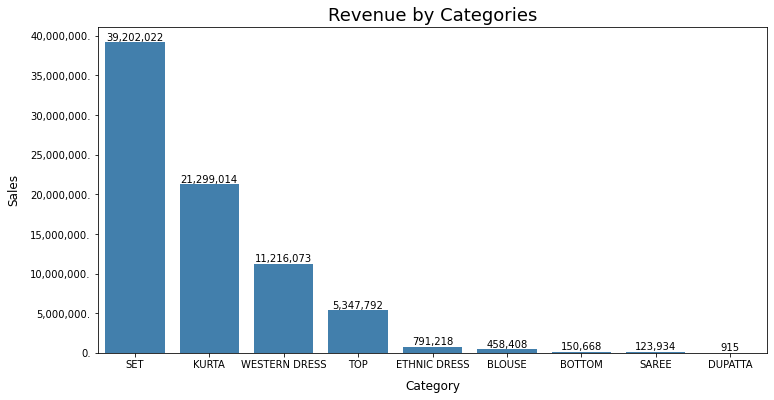

In [57]:
plt.figure(figsize = (12, 6))
ax_q1 = sns.barplot(y = 'Amount', x='Category', palette = ['#3182bd'], data = df_q1)
plt.title('Revenue by Categories', fontsize= _title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}.")
ax_q1.yaxis.set_major_formatter(formatter)
ax_q1.xaxis.labelpad = _axis_label_pad
ax_q1.yaxis.labelpad = _axis_label_pad

for i, bar in enumerate(ax_q1.containers[0].patches):
    ax_q1.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
        '{:,.0f}'.format(bar.get_height()), ha='center', va='bottom')
plt.xlabel("Category", weight = _fweight, fontsize=_axis_label_size)
plt.ylabel("Sales", weight = _fweight, fontsize=_axis_label_size)
plt.savefig('img\\Revenue_by_categories.jpg', dpi=300)
plt.show()


## Answer Q2: Which are the 20 Best-Selling Products? [&#129081;](#Top)<a name="AQ2"></a>

In [58]:
df_q2 = df.groupby(['Category', 'ASIN'])[['Qty','Amount']].sum()\
                                     .sort_values('Qty', ascending=False)\
                                     .head(20)\
                                     .reset_index()
df_q2

Category        ASIN  Qty     Amount
0   WESTERN DRESS  B09SDXFFQ1  661  524581.77
1   WESTERN DRESS  B09SDY8DCT  561  454290.16
2   WESTERN DRESS  B09SDYQ3WG  503  407302.57
3           KURTA  B081WSCKPQ  485  194645.29
4             SET  B08XNJG8B1  467  526536.20
5             SET  B08XNJ19QH  421  479937.14
6   WESTERN DRESS  B09SDXRYBG  415  332155.24
7           KURTA  B081WX4G4Q  399  169808.87
8   WESTERN DRESS  B09SDY9SQ6  386  303616.70
9             SET  B08XQBF1G4  373  284058.96
10  WESTERN DRESS  B09SDXSQ33  359  275966.88
11  WESTERN DRESS  B09SDY4VDC  353  276375.80
12            SET  B08XQ98B2Q  350  267030.48
13            SET  B08XQ8MCKP  348  258716.00
14          KURTA  B081WVMMCY  344  146626.29
15          KURTA  B08KRXV1QR  291  115806.00
16            SET  B08B3Z2YY3  289  250171.98
17            SET  B0894X27FC  281  193079.79
18            SET  B08XNDL1DL  272  305616.95
19  WESTERN DRESS  B099NQQ79L  268  235151.42

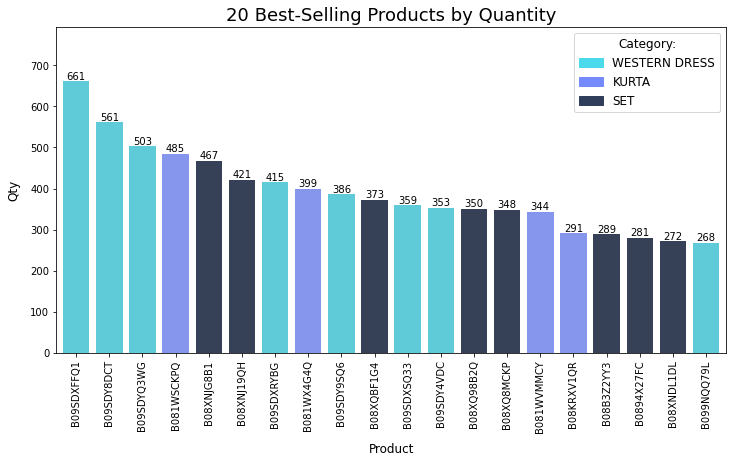

In [59]:
colors_dict = {'WESTERN DRESS': '#4BD9EC', 'KURTA': '#758BFD', 'SET': '#313E5B'} 
col_list = [colors_dict.get(cat) for cat in df_q2['Category']]

plt.figure(figsize = (12, 6))
ax_q2 = sns.barplot(y = 'Qty', x='ASIN', palette = col_list, data = df_q2)
plt.title('20 Best-Selling Products by Quantity', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q2.yaxis.set_major_formatter(formatter)
ax_q2.xaxis.labelpad = _axis_label_pad
ax_q2.yaxis.labelpad = _axis_label_pad
ax_q2.margins(0.01, 0.2)

for i, bar in enumerate(ax_q2.containers[0].patches):
    ax_q2.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
        '{:,.0f}'.format(bar.get_height()), ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')
plt.xlabel("Product", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Qty", weight = _fweight, fontsize= _axis_label_size)

legend_entries = []
for elem in df_q2['Category'].unique():
    legend_entries.append(mpatches.Patch(color=colors_dict.get(elem), label=elem))
plt.legend(handles=legend_entries, title='Category:', title_fontsize= _legend_title_size, fontsize=_legend_content_size)
plt.savefig('img\\20_Best_Selling_Products_by_Quantity.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Answer to Q3: Which are the 20 Best-Selling Products by Revenue? [&#129081;](#Top)<a name="AQ3"></a>

In [60]:
df_q3 = df.groupby(['Category', 'ASIN'])[['Amount', 'Qty']].sum()\
                                     .sort_values('Amount', ascending=False)\
                                     .head(20)\
                                     .reset_index()
df_q3

Category        ASIN     Amount  Qty
0             SET  B08XNJG8B1  526536.20  467
1   WESTERN DRESS  B09SDXFFQ1  524581.77  661
2             SET  B08XNJ19QH  479937.14  421
3   WESTERN DRESS  B09SDY8DCT  454290.16  561
4   WESTERN DRESS  B09SDYQ3WG  407302.57  503
5   WESTERN DRESS  B09SDXRYBG  332155.24  415
6             SET  B08XNDL1DL  305616.95  272
7   WESTERN DRESS  B09SDY9SQ6  303616.70  386
8             SET  B08XQBF1G4  284058.96  373
9   WESTERN DRESS  B09SDY4VDC  276375.80  353
10  WESTERN DRESS  B09SDXSQ33  275966.88  359
11            SET  B08XQ98B2Q  267030.48  350
12            SET  B08XNJ8P3S  259032.58  221
13            SET  B08XQ8MCKP  258716.00  348
14            SET  B08B3Z2YY3  250171.98  289
15  WESTERN DRESS  B099NQQ79L  235151.42  268
16            SET  B08XNHXSFZ  221741.86  197
17  WESTERN DRESS  B099NRCT7B  217865.04  257
18  WESTERN DRESS  B099NR7612  214934.45  244
19            SET  B0983F3BLZ  201821.14  138

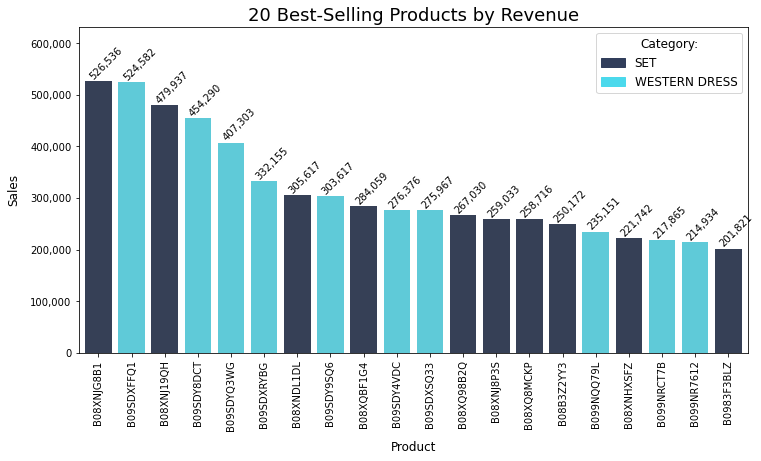

In [61]:
colors_dict = {'WESTERN DRESS': '#4BD9EC', 'KURTA': '#758BFD', 'SET': '#313E5B'} 
col_list = [colors_dict.get(cat) for cat in df_q3['Category']]

plt.figure(figsize = (12, 6))
ax_q3 = sns.barplot(y = 'Amount', x='ASIN', palette = col_list, data = df_q3)
plt.title('20 Best-Selling Products by Revenue', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q3.yaxis.set_major_formatter(formatter)
ax_q3.xaxis.labelpad = _axis_label_pad
ax_q3.yaxis.labelpad = _axis_label_pad

for i, bar in enumerate(ax_q3.containers[0].patches):
    ax_q3.text(bar.get_x() + bar.get_width()*0.8, bar.get_height(),
        '{:,.0f}'.format(bar.get_height()), ha='center', va='bottom', rotation=45)
    
plt.xticks(rotation=90, ha='center')
plt.xlabel("Product", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Sales", weight = _fweight, fontsize= _axis_label_size)

legend_entries = []
for elem in df_q3['Category'].unique():
    legend_entries.append(mpatches.Patch(color=colors_dict.get(elem), label=elem))
plt.legend(handles=legend_entries, title='Category:', title_fontsize= _legend_title_size, fontsize=_legend_content_size)
ax_q3.margins(0.01, 0.2)
plt.savefig('img\\20_Best_Selling_Products_by_Revenue.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Answer Q4: Which are the 20 cities that made the most orders? [&#129081;](#Top)<a name="AQ4"></a>

In [62]:
df_q4 = df.groupby(['ship_state','ship_city'])[['Order_ID']].count()\
                                    .sort_values('Order_ID', ascending=False)\
                                    .head(20)\
                                    .reset_index()
df_q4

ship_state      ship_city  Order_ID
0        KARNATAKA      BANGALORE     13342
1        TELANGANA      HYDERABAD      9092
2      MAHARASHTRA         MUMBAI      7122
3            DELHI      NEW DELHI      6753
4       TAMIL NADU        CHENNAI      6284
5      MAHARASHTRA           PUNE      4616
6      WEST BENGAL        KOLKATA      2844
7          HARYANA       GURUGRAM      1954
8      MAHARASHTRA          THANE      1877
9    UTTAR PRADESH        LUCKNOW      1627
10   UTTAR PRADESH          NOIDA      1627
11   UTTAR PRADESH      GHAZIABAD      1484
12         GUJARAT      AHMEDABAD      1444
13     MAHARASHTRA    NAVI MUMBAI      1403
14       RAJASTHAN         JAIPUR      1062
15      TAMIL NADU     COIMBATORE       891
16  ANDHRA PRADESH  VISAKHAPATNAM       858
17         HARYANA      FARIDABAD       820
18           BIHAR          PATNA       816
19          ODISHA    BHUBANESWAR       780

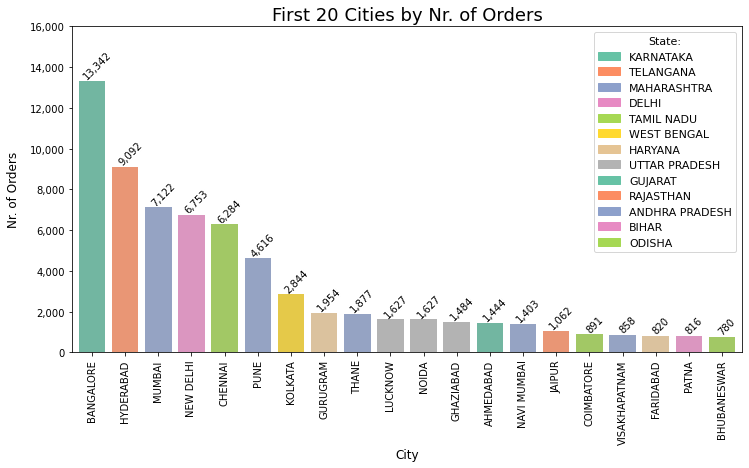

In [63]:
plt.figure(figsize = (12, 6))

plt.title('First 20 Cities by Nr. of Orders', fontsize=_title_size)

palette_colors = sns.color_palette('Set2',len(df_q4['ship_state'].unique()))
palette_dict = {state: color for state, color in zip(list(df_q4['ship_state'].unique()), palette_colors)}
col_list = [palette_dict.get(state) for state, city in zip(df_q4['ship_state'],df_q4['ship_city'])]

ax_q4 = sns.barplot(y = 'Order_ID', x='ship_city', palette = col_list, data = df_q4)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q4.yaxis.set_major_formatter(formatter)
ax_q4.yaxis.labelpad = _axis_label_pad

for i, bar in enumerate(ax_q4.containers[0].patches):
    ax_q4.text(bar.get_x() + bar.get_width()*0.7, bar.get_height(),
        '{:,.0f}'.format(bar.get_height()), ha='center', va='bottom', rotation=45)
plt.xticks(rotation=90)
plt.xlabel("City", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Nr. of Orders", weight = _fweight, fontsize= _axis_label_size)

legend_entries = []
for elem in df_q4['ship_state'].unique():
    legend_entries.append(mpatches.Patch(color=palette_dict.get(elem), label=elem))
plt.legend(handles=legend_entries, title='State:', title_fontsize= _legend_title_size-1, fontsize=_legend_content_size-1)

ax_q4.margins(0.01, 0.2)
plt.savefig('img\\First_20_Cities_by_Nr_of_Orders.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Answer Q5: Which are the 20 cities that more income generate? [&#129081;](#Top)<a name="AQ5"></a>

In [64]:
df_q5 = df.groupby(['ship_state','ship_city'])[['Amount','Qty']].sum()\
                                    .sort_values('Amount', ascending=False)\
                                     .head(20)\
                                    .reset_index()

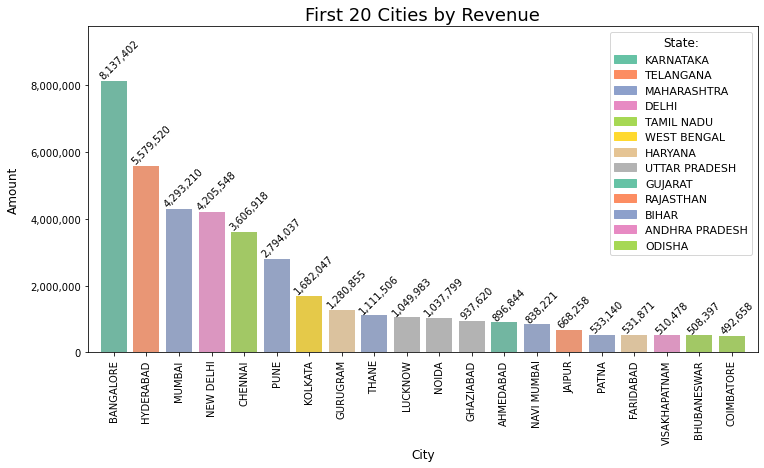

In [65]:
plt.figure(figsize = (12, 6))
plt.title('First 20 Cities by Revenue', fontsize=_title_size)

palette_colors = sns.color_palette('Set2',len(df_q5['ship_state'].unique()))
palette_dict = {state: color for state, color in zip(list(df_q5['ship_state'].unique()), palette_colors)}
col_list = [palette_dict.get(state) for state, city in zip(df_q5['ship_state'],df_q5['ship_city'])]

ax_q5 = sns.barplot(y = 'Amount', x='ship_city', palette = col_list, data = df_q5)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q5.yaxis.set_major_formatter(formatter)

ax_q5.yaxis.labelpad = _axis_label_pad

for i, bar in enumerate(ax_q5.containers[0].patches):
    ax_q5.text(bar.get_x() + bar.get_width()*0.7, bar.get_height(),
        '{:,.0f}'.format(bar.get_height()), ha='center', va='bottom', rotation=45)
plt.xticks(rotation=90)
plt.xlabel("City", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Amount", weight = _fweight, fontsize= _axis_label_size)

legend_entries = []
for elem in df_q5['ship_state'].unique():
    legend_entries.append(mpatches.Patch(color=palette_dict.get(elem), label=elem))
plt.legend(handles=legend_entries, title='State:', title_fontsize= _legend_title_size, fontsize=_legend_content_size-1)

ax_q5.margins(0.02, 0.2)
plt.savefig('img\\First_20_Cities_by_Revenue.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Answer Q6: How many orders are fulfilled by Amazon and how many by the Merchant? [&#129081;](#Top)<a name="AQ6"></a>

In [66]:
# How are the order volume and revenues distributed on the Fulfilment Method?
df_fulfilment_stats = pd.DataFrame(data= df.groupby(['Fulfilment'])['Order_ID'].count())
df_fulfilment_stats = df_fulfilment_stats.rename(columns={'Order_ID': 'Nr. of Orders'})
df_fulfilment_stats['% of Orders'] = [ x / (df_fulfilment_stats['Nr. of Orders'].sum()) for x in df_fulfilment_stats['Nr. of Orders'] ]
df_fulfilment_stats['Tot. Sales'] = df.groupby(['Fulfilment'])[['Amount']].sum()
df_fulfilment_stats['% of Tot. Sales'] = [ x / (df_fulfilment_stats['Tot. Sales'].sum()) for x in df_fulfilment_stats['Tot. Sales'] ]
df_fulfilment_stats

Nr. of Orders  % of Orders  Tot. Sales  % of Tot. Sales
Fulfilment                                                         
Amazon              89692     0.695454  54319516.0         0.691176
Merchant            39277     0.304546  24270527.3         0.308824

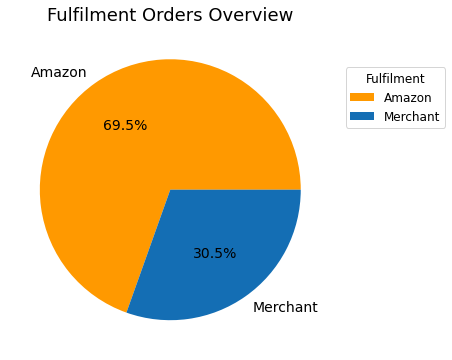

In [67]:
plt.figure(figsize = (8, 6))
fig_x2 = df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%", colors = ('#FF9900','#146EB4'), 
                                                  textprops={'fontsize': 14})
fig_x2.set(ylabel=None)
plt.legend(title = 'Fulfilment', title_fontsize= _legend_title_size, fontsize=_legend_content_size, bbox_to_anchor=(1,0.8),
                          bbox_transform=plt.gcf().transFigure)
plt.title('Fulfilment Orders Overview', fontsize= _title_size);
plt.savefig('img\\Fulfilment_Orders_Overview.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [68]:
df_shipment_stats = df.query("Courier_Status != 'Unknown'").groupby(['Courier_Status','Fulfilment'])[['Amount','Qty']].sum()\
                                    .sort_values('Amount', ascending=False)\
                                    .reset_index()

In [69]:
df_shipment_stats

Courier_Status Fulfilment      Amount    Qty
0        Shipped     Amazon  50329299.0  77858
1        Shipped   Merchant  20726730.0  32035
2      Unshipped     Amazon   3990217.0   6226
3      Unshipped   Merchant    353625.0    527
4      Cancelled     Amazon         0.0      0

In [70]:
df_shipment_stats['Nr. of Orders'] = df.groupby(['Courier_Status','Fulfilment'])[['Order_ID']].count()\
                                    .sort_values('Order_ID', ascending=False)\
                                    .reset_index()['Order_ID']

In [71]:
df_shipment_stats

Courier_Status Fulfilment      Amount    Qty  Nr. of Orders
0        Shipped     Amazon  50329299.0  77858          77603
1        Shipped   Merchant  20726730.0  32035          31881
2      Unshipped     Amazon   3990217.0   6226           6872
3      Unshipped   Merchant    353625.0    527           6157
4      Cancelled     Amazon         0.0      0           5932

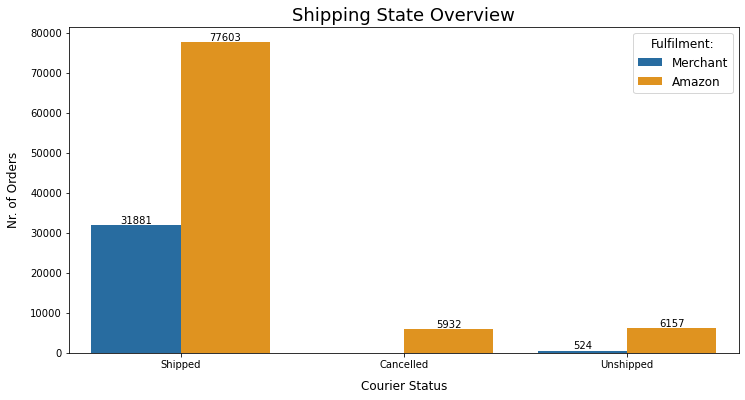

In [72]:
plt.figure(figsize = (12, 6))

ax6 = sns.countplot(x = 'Courier_Status', hue = 'Fulfilment', palette = ['#146EB4','#FF9900'], data = df.query("Courier_Status != 'Unknown'"));
plt.title('Shipping State Overview', fontsize=_title_size);
ax6.xaxis.labelpad = _axis_label_pad
ax6.yaxis.labelpad = _axis_label_pad

for i in ax6.containers:
    ax6.bar_label(i,)
plt.xlabel("Courier Status", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Nr. of Orders", weight = _fweight, fontsize= _axis_label_size)
plt.legend(title='Fulfilment:', title_fontsize= _legend_title_size, fontsize=_legend_content_size)
plt.savefig('img\\Shipping_State_Overview.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show;

In [73]:
df_q7 = df.groupby(['ship_city', 'Fulfilment'])[['Amount','Qty']].sum()\
                                    .sort_values('Amount', ascending=False)\
                                    .reset_index()

In [74]:
# 20 top cities
cities = []
i=0
while len(cities) < 20:
    if df_q7['ship_city'][i] not in cities:
        cities.append(df_q7['ship_city'][i])
    i+=1

# Amount by City, grouped by fulfilment 
fulfil_stat_amz =[]
fulfil_stat_merc =[]
for city in cities:
    fulfil_stat_amz.append(df_q7.query("ship_city == '"+city+"' and Fulfilment == 'Amazon'").values[0][2])
    fulfil_stat_merc.append(df_q7.query("ship_city == '"+city+"' and Fulfilment == 'Merchant'").values[0][2])

# Arrays for bar-plot
fulfil_stat_amz = np.array(fulfil_stat_amz)
fulfil_stat_merc = np.array(fulfil_stat_merc)
total= np.add(fulfil_stat_amz,fulfil_stat_merc)

fulfil_dict = {
        'Amazon': (fulfil_stat_amz, np.array([amz/tot for tot, amz in zip(total, fulfil_stat_amz)])),
        'Merchant': (fulfil_stat_merc, np.array([merc/tot for tot, merc in zip(total, fulfil_stat_merc)]))
}

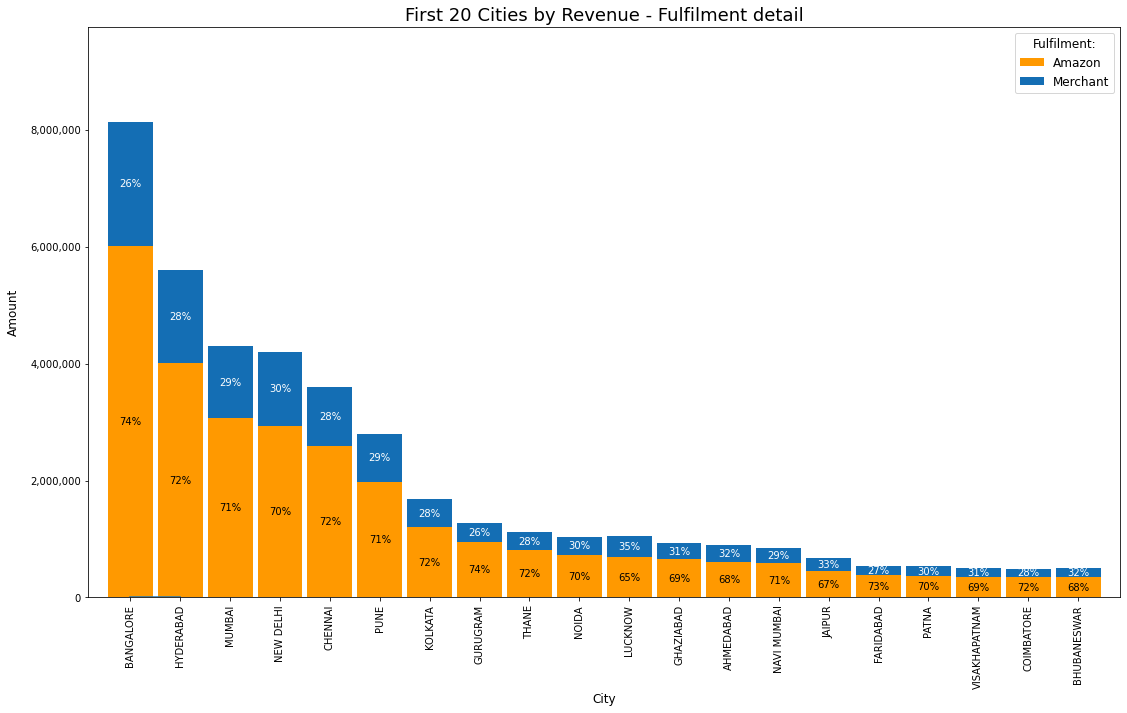

In [75]:
cities = tuple(cities)
ax_q7_width = 0.9
color_bars = ['#FF9900','#146EB4']
color_bar_labels= ['#000000','#FFFFFF']
fig_q7, ax_q7 = plt.subplots(1,1);
ax_q7.set_title('First 20 Cities by Revenue - Fulfilment detail', fontsize=_title_size)
fig_q7.set_size_inches(18.5, 10.5);

bottom = np.zeros(len(cities))
ax_q7.plot([1, 2])

for i, fulfil in enumerate(fulfil_dict.items()):
    p = ax_q7.bar(x= cities, height=fulfil[1][0], width=ax_q7_width, label=fulfil[0], bottom=bottom, color=color_bars[i])
    bottom += fulfil[1][0]
    ax_q7.bar_label(p, labels=[f"{x:.0%}" for x in fulfil[1][1]], label_type='center',color=color_bar_labels[i] )

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q7.yaxis.set_major_formatter(formatter)

ax_q7.yaxis.labelpad = _axis_label_pad


plt.xticks(rotation=90)
plt.xlabel("City", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Amount", weight = _fweight, fontsize= _axis_label_size)

ax_q7.legend(title='Fulfilment:', title_fontsize= _legend_title_size, fontsize=_legend_content_size)
ax_q7.margins(0.02, 0.2)

plt.savefig('img\\First_20_Cities_by_Revenue_Fulfilment_hue.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show();

The Fulfilment ratio between Amazon and Merchant is evenly distributed even when we consider the individual destination cities.

## FINAL CONCLUSIONS [&#129081;](#Top)<a name="Conclusions"></a>

In the course of the analysis:
* It was established that Western Dress, Kurta and Set are the categories which have sold most.
* It was verified that the 20 Best-Selling Products by quantity belongs to the categories Western Dress, Kurta and Set.  
* On the other hand, the 20 Best-Selling Products by revenue belongs only to the categories Western Dress and Set.  
* Also it was performed a fulfilment and shipping state overview, discovering an uniformly distributed fulfillment method even among the dectionation cities.

   
---   
   




### Data Source
The data for this project can be found at [data.world](https://data.world/anilsharma87), thanks to [ANil](https://data.world/anilsharma87).

### Author 
[Barbara Callegari](https://numberslab.net)  
To learn more about the author visit her [LinkedIn Profile](https://www.linkedin.com/in/barbaracallegari)

### Licence
All rights reserved 2023. All code is **created and owned by Barbara Callegari**.   
**If you use his code, please give her a skill endorsement in Python and Data Analysis on LinkedIn**.   
Visit her at https://www.linkedin.com/in/barbaracallegari